In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import geopandas as gpd
import plotly.express as px

In [2]:
damage_report = pd.read_csv("hw05-data/Damage Reports/mc1-reports-data.csv",low_memory=False)

In [3]:
damage_report['time'] = pd.to_datetime(damage_report['time'])
damage_report.set_index('time', inplace=True)
damage_report

,sewer_and_water,power,roads_and_bridges,medical,buildings,shake_intensity,location
time,,,,,,,
2020-04-08 17:50:00,10.0,6.0,10.0,3.0,8.0,NaN,1
2020-04-09 13:50:00,2.0,10.0,0.0,8.0,4.0,0.0,1
2020-04-09 00:20:00,7.0,10.0,10.0,9.0,10.0,0.0,1
2020-04-08 17:25:00,1.0,1.0,2.0,10.0,7.0,NaN,1
2020-04-08 02:50:00,9.0,7.0,1.0,6.0,9.0,NaN,1
...,...,...,...,...,...,...,...
2020-04-10 02:30:00,9.0,10.0,10.0,NaN,7.0,2.0,8
2020-04-10 02:30:00,8.0,10.0,10.0,NaN,7.0,1.0,8
2020-04-09 16:45:00,10.0,9.0,10.0,NaN,8.0,1.0,8


In [4]:
# Aggregate by time, location, and geometry, calculating the mean while ignoring NaN values
damage_report_clean = damage_report.groupby(['time', 'location']).agg({
    'sewer_and_water': lambda x: x.mean(skipna=True),
    'power': lambda x: x.mean(skipna=True),
    'roads_and_bridges': lambda x: x.mean(skipna=True),
    'medical': lambda x: x.mean(skipna=True),
    'buildings': lambda x: x.mean(skipna=True),
    'shake_intensity': lambda x: x.mean(skipna=True)
}).reset_index()

# Output the cleaned and aggregated DataFrame
damage_report_clean


,time,location,sewer_and_water,power,roads_and_bridges,medical,buildings,shake_intensity
0,2020-04-06,2,2.0,8.0,5.0,NaN,3.0,0.0
1,2020-04-06,3,6.0,3.0,10.0,10.0,9.0,NaN
2,2020-04-06,4,9.0,1.5,9.5,NaN,6.5,1.0
3,2020-04-06,8,9.0,7.0,5.0,NaN,4.0,NaN
4,2020-04-06,15,6.0,2.0,9.0,NaN,4.0,1.0
...,...,...,...,...,...,...,...,...
10284,2020-04-11,2,6.0,1.5,5.0,NaN,4.5,0.0
10285,2020-04-11,6,7.0,7.0,8.0,10.0,10.0,NaN
10286,2020-04-11,13,4.0,9.0,7.0,NaN,7.0,NaN
10287,2020-04-11,15,5.0,1.0,3.0,NaN,2.0,NaN


In [5]:
sth_neighborhood = gpd.read_file( "hw05-data/Sensor Data and Maps/StHimarkNeighborhoodShapefiles/StHimark.shp")
sth_neighborhood

,Id,Nbrhood,geometry
0,1,Palace Hills,"POLYGON ((-13351493.656 17391.306, -13352311.8..."
1,2,Northwest,"POLYGON ((-13351493.656 17391.306, -13351491.3..."
2,3,Old Town,"POLYGON ((-13346410.677 22553.433, -13346405.9..."
3,4,Safe Town,"POLYGON ((-13337755.558 23739.715, -13337518.9..."
4,5,Southwest,"POLYGON ((-13352257.891 15740.887, -13352311.8..."
5,6,Downtown,"POLYGON ((-13347322.252 13950.46, -13349992.25..."
6,7,Wilson Forest,"POLYGON ((-13326281.927 6053.222, -13328243.84..."
7,8,Scenic Vista,"POLYGON ((-13326281.927 6053.222, -13326284.92..."
8,9,Broadview,"POLYGON ((-13336454.829 1419.691, -13336684.69..."
9,10,Chapparal,"POLYGON ((-13335203.444 7716.247, -13335278.73..."


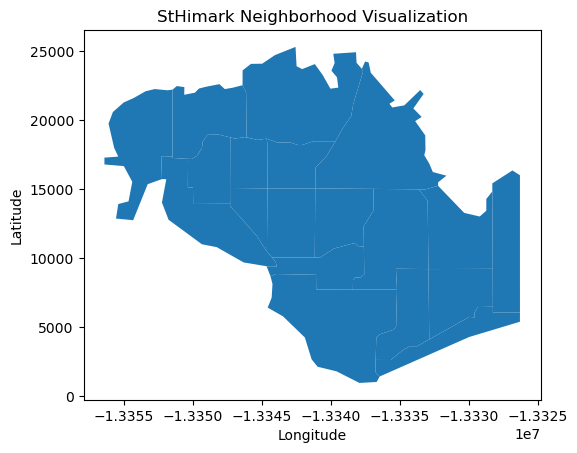

In [6]:
sth_neighborhood.plot()
plt.title("StHimark Neighborhood Visualization")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [7]:
# damage_report_indexed = damage_report_clean.reset_index()
# damage_report_indexed

In [8]:
sth_neighborhood = sth_neighborhood.rename(columns={"Id": "location"})
damage_report_wiz_neighborhoods = damage_report_clean.merge(sth_neighborhood[['location', 'geometry']], how='left')
damage_report_wiz_neighborhoods

,time,location,sewer_and_water,power,roads_and_bridges,medical,buildings,shake_intensity,geometry
0,2020-04-06,2,2.0,8.0,5.0,NaN,3.0,0.0,"POLYGON ((-13351493.656 17391.306, -13351491.3..."
1,2020-04-06,3,6.0,3.0,10.0,10.0,9.0,NaN,"POLYGON ((-13346410.677 22553.433, -13346405.9..."
2,2020-04-06,4,9.0,1.5,9.5,NaN,6.5,1.0,"POLYGON ((-13337755.558 23739.715, -13337518.9..."
3,2020-04-06,8,9.0,7.0,5.0,NaN,4.0,NaN,"POLYGON ((-13326281.927 6053.222, -13326284.92..."
4,2020-04-06,15,6.0,2.0,9.0,NaN,4.0,1.0,"POLYGON ((-13344655.638 18673.309, -13344617.0..."
...,...,...,...,...,...,...,...,...,...
10284,2020-04-11,2,6.0,1.5,5.0,NaN,4.5,0.0,"POLYGON ((-13351493.656 17391.306, -13351491.3..."
10285,2020-04-11,6,7.0,7.0,8.0,10.0,10.0,NaN,"POLYGON ((-13347322.252 13950.46, -13349992.25..."
10286,2020-04-11,13,4.0,9.0,7.0,NaN,7.0,NaN,"POLYGON ((-13333633.544 14998.643, -13332978.0..."
10287,2020-04-11,15,5.0,1.0,3.0,NaN,2.0,NaN,"POLYGON ((-13344655.638 18673.309, -13344617.0..."


In [9]:
damage_report_wiz_neighborhoods.set_index('time')

,location,sewer_and_water,power,roads_and_bridges,medical,buildings,shake_intensity,geometry
time,,,,,,,,
2020-04-06,2,2.0,8.0,5.0,NaN,3.0,0.0,"POLYGON ((-13351493.656 17391.306, -13351491.3..."
2020-04-06,3,6.0,3.0,10.0,10.0,9.0,NaN,"POLYGON ((-13346410.677 22553.433, -13346405.9..."
2020-04-06,4,9.0,1.5,9.5,NaN,6.5,1.0,"POLYGON ((-13337755.558 23739.715, -13337518.9..."
2020-04-06,8,9.0,7.0,5.0,NaN,4.0,NaN,"POLYGON ((-13326281.927 6053.222, -13326284.92..."
2020-04-06,15,6.0,2.0,9.0,NaN,4.0,1.0,"POLYGON ((-13344655.638 18673.309, -13344617.0..."
...,...,...,...,...,...,...,...,...
2020-04-11,2,6.0,1.5,5.0,NaN,4.5,0.0,"POLYGON ((-13351493.656 17391.306, -13351491.3..."
2020-04-11,6,7.0,7.0,8.0,10.0,10.0,NaN,"POLYGON ((-13347322.252 13950.46, -13349992.25..."
2020-04-11,13,4.0,9.0,7.0,NaN,7.0,NaN,"POLYGON ((-13333633.544 14998.643, -13332978.0..."


In [10]:
damage_report_wiz_neighborhoods['geometry'] = damage_report_wiz_neighborhoods['geometry'].apply(lambda geom: geom.wkt)

In [11]:
damage_report_wiz_neighborhoods['time'] = pd.to_datetime(damage_report_wiz_neighborhoods['time'])
damage_report_wiz_neighborhoods.set_index('time', inplace=True)

In [12]:
# damage_report_indexed = damage_report_clean.reset_index()
# damage_report_indexed

In [ ]:
fig = px.choropleth(damage_report_wiz_neighborhoods,
                    geojson=damage_report_wiz_neighborhoods.geometry,
                    locations=damage_report_wiz_neighborhoods.index,
                    color="sewer_and_water",  # or any other attribute
                    animation_frame=damage_report_wiz_neighborhoods.index.strftime('%Y-%m-%d %H:%M:%S'),
                    title="Infrastructure Status Over Time by Neighborhood")

# Update map view
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


# SAMPLE DATA TEST

In [13]:
# Sample 10 observations from the cleaned data
sample_data = damage_report_wiz_neighborhoods.sample(n=10, random_state=1)

In [18]:

# Assuming 'sth_neighborhood' is your base map (GeoDataFrame)
# and 'sample_data' contains the columns including 'time', 'geometry', and 'sewer_and_water' for visualization

# Convert 'time' in sample_data to datetime and ensure it's sorted
sample_data = sample_data.reset_index()  # Reset index if 'time' is in the index
sample_data['time'] = pd.to_datetime(sample_data['time'])
sample_data = sample_data.sort_values(by='time')

# Plot heat map with Plotly using 'sewer_and_water' as the intensity value and animate by 'time'
fig = px.choropleth(
    sample_data,
    geojson=sth_neighborhood.__geo_interface__,  # Convert sth_neighborhood to GeoJSON format
    locations=sample_data.index,
    color="sewer_and_water",  # Adjust this to any attribute you want to visualize as heat intensity
    animation_frame=sample_data['time'].dt.strftime('%Y-%m-%d %H:%M:%S'),
    title="Infrastructure Status Over Time by Neighborhood",
    hover_name="location",  # Optional: show location on hover
)

# Customize map appearance
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    coloraxis_colorbar=dict(title="Sewer and Water Damage Intensity"),
    sliders=[dict(currentvalue={"prefix": "Date: "})]
)

# Show the interactive map with time slider
fig.show()
